In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

In [113]:
filepath = "../data/cr_loan_raw.csv"
df = pd.read_csv(filepath)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [114]:
df.drop_duplicates(inplace=True)

indexes_to_drop = df[(df["person_age"] > 100) | (df["person_emp_length"] == 123)].index
df.drop(indexes_to_drop, inplace=True)

In [115]:
print(f'Columns with the number of missing values')
print((df.isnull().sum() / len(df)) * 100)

Columns with the number of missing values
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.736894
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.546731
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


       person_emp_length  loan_int_rate
count       31522.000000   29315.000000
mean            4.782850      11.017099
std             4.037343       3.241718
min             0.000000       5.420000
25%             2.000000       7.900000
50%             4.000000      10.990000
75%             7.000000      13.470000
max            41.000000      23.220000


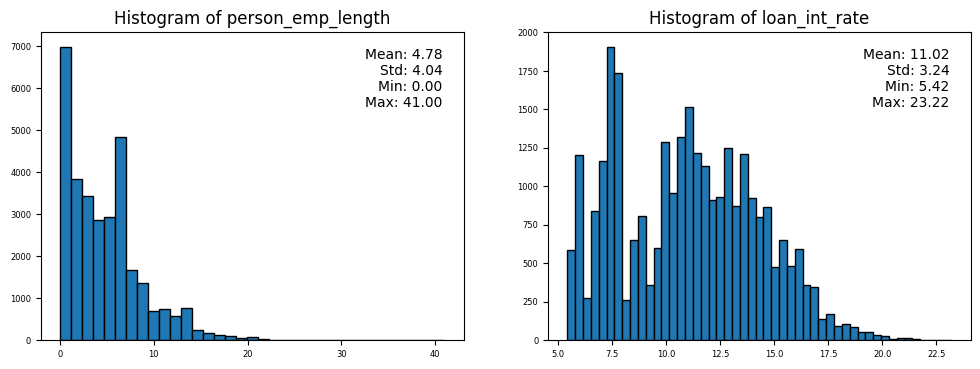

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
missing_column = ["person_emp_length", "loan_int_rate"]

print(df[missing_column].describe())

for index, missing in enumerate(missing_column):
    data = df[missing].dropna()
    n = len(data)
    
    if len(np.unique(data)) < 100:
        bins = len(np.unique(data))
    else:
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        bin_width = 2 * iqr * n ** (-1 / 3)
        bins = min(int((data.max() - data.min()) / bin_width), 100)

    axs[index].hist(data, bins=bins, edgecolor='black')

    textstr = f'Mean: {data.mean():.2f}\nStd: {data.std():.2f}\nMin: {data.min():.2f}\nMax: {data.max():.2f}'
    axs[index].text(0.95, 0.95, textstr, transform=axs[index].transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='right')
    
    axs[index].set_title(f'Histogram of {missing}')
    axs[index].tick_params(axis='both', labelsize=6, labelbottom=True)

In [117]:
categoricals = np.append(df.select_dtypes(include="object").columns.array, "loan_status")
numericals = np.setdiff1d(df.columns.array, categoricals)

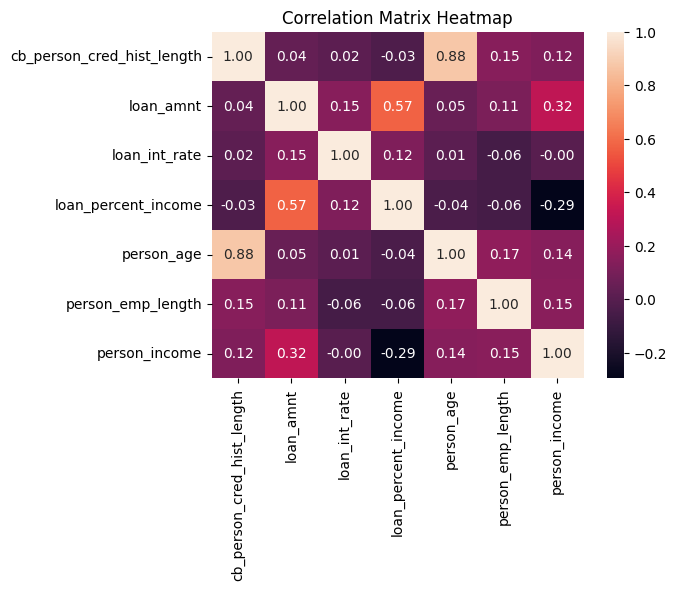

In [118]:
correlation_matrix = df[numericals].corr()

plt.figure(figsize=(6, 4.5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [119]:
for missing_column in ["loan_int_rate", "person_emp_length"]:
    for categorical in categoricals: 
        missing_proportions = df.groupby(categorical)[missing_column].apply(lambda x: x.isnull().mean())
        print(missing_proportions,"\n")

person_home_ownership
MORTGAGE    0.098384
OTHER       0.122642
OWN         0.088568
RENT        0.093990
Name: loan_int_rate, dtype: float64 

loan_intent
DEBTCONSOLIDATION    0.097514
EDUCATION            0.092214
HOMEIMPROVEMENT      0.087646
MEDICAL              0.101953
PERSONAL             0.091703
VENTURE              0.098961
Name: loan_int_rate, dtype: float64 

loan_grade
A    0.092506
B    0.101021
C    0.097732
D    0.085935
E    0.086189
F    0.112033
G    0.078125
Name: loan_int_rate, dtype: float64 

cb_person_default_on_file
N    0.096064
Y    0.092686
Name: loan_int_rate, dtype: float64 

loan_status
0    0.096876
1    0.090435
Name: loan_int_rate, dtype: float64 

person_home_ownership
MORTGAGE    0.026036
OTHER       0.000000
OWN         0.067109
RENT        0.022414
Name: person_emp_length, dtype: float64 

loan_intent
DEBTCONSOLIDATION    0.027944
EDUCATION            0.025433
HOMEIMPROVEMENT      0.026433
MEDICAL              0.028633
PERSONAL             0.027293

In [120]:
df.fillna({"loan_int_rate": df["loan_int_rate"].median()}, inplace=True)
df.fillna({"person_emp_length": df["person_emp_length"].median()}, inplace=True)

In [121]:
df.isnull().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                 False
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [122]:
df.to_csv("../data/cr_loan_preprocessed.csv",index=False)